# Datenbereinigung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename1 = 'data/2019/Unfallorte2019_LinRef.txt'
filename2 = 'data/2018/Unfallorte2018_LinRef.txt'
filename3 = 'data/2017/Unfallorte2017_LinRef.txt'
filename4 = 'data/2016/Unfallorte_2016_LinRef.txt'

In [6]:
df_2019 = pd.read_csv(filename1, delimiter=';',decimal=',')

In [7]:
df_2018 = pd.read_csv(filename2, delimiter=';',decimal=',')

In [8]:
df_2017 = pd.read_csv(filename3, delimiter=';',decimal=',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df_2016 = pd.read_csv(filename4, delimiter=';',decimal=',')

In [10]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268370 entries, 0 to 268369
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OBJECTID     268370 non-null  int64 
 1   ULAND        268370 non-null  int64 
 2   UREGBEZ      268370 non-null  int64 
 3   UKREIS       268370 non-null  int64 
 4   UGEMEINDE    268370 non-null  int64 
 5   UJAHR        268370 non-null  int64 
 6   UMONAT       268370 non-null  int64 
 7   USTUNDE      268370 non-null  int64 
 8   UWOCHENTAG   268370 non-null  int64 
 9   UKATEGORIE   268370 non-null  int64 
 10  UART         268370 non-null  int64 
 11  UTYP1        268370 non-null  int64 
 12  ULICHTVERH   268370 non-null  int64 
 13  IstRad       268370 non-null  int64 
 14  IstPKW       268370 non-null  int64 
 15  IstFuss      268370 non-null  int64 
 16  IstKrad      268370 non-null  int64 
 17  IstGkfz      268370 non-null  int64 
 18  IstSonstige  268370 non-null  int64 
 19  LI

In [11]:
df_2019.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND
count,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.0,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.00000,268370.000000,268370.000000,268370.000000
mean,134185.500000,7.282833,2.853404,41.665525,63.106573,2019.0,6.701714,13.249048,4.104196,2.793207,3.891117,3.844640,0.441573,0.277784,0.804162,0.094262,0.13841,0.050143,0.098878,0.282185
std,77471.890209,3.585170,2.457828,25.923244,107.834334,0.0,3.266014,4.786792,1.867870,0.428173,2.560706,2.116382,0.796565,0.447907,0.396845,0.292193,0.34533,0.218241,0.298499,0.490314
min,1.000000,1.000000,0.000000,1.000000,0.000000,2019.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,67093.250000,5.000000,1.000000,15.000000,0.000000,2019.0,4.000000,10.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,134185.500000,7.000000,3.000000,41.000000,16.000000,2019.0,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,201277.750000,9.000000,4.000000,62.000000,89.000000,2019.0,9.000000,17.000000,6.000000,3.000000,5.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,268370.000000,16.000000,9.000000,91.000000,718.000000,2019.0,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [12]:
df_2019.rename(columns={'IstSonstige': 'IstSonstig'}, inplace=True)

In [36]:
df_2019['Jahr']=2019

In [37]:
df_2019.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND,Jahr
0,1,1,0,57,25,2019,1,5,5,3,...,0,0,0,0,579075.960927323440000,6023531.318255106000000,10.216713530000050,54.353460244000075,1,2019
1,2,1,0,3,0,2019,1,6,2,3,...,0,0,0,0,611914.920398440210000,5968419.523143058600000,10.701388439000027,53.852200108000034,1,2019
2,3,1,0,53,91,2019,1,7,6,3,...,0,0,0,0,597807.670711245390000,5939158.772521587100000,10.477759560000038,53.592131367000036,1,2019
3,4,1,0,62,76,2019,1,5,6,3,...,0,0,0,0,570688.991616101940000,5957625.627219760800000,10.072328698000035,53.762448160000076,2,2019
4,5,1,0,1,0,2019,1,8,5,3,...,0,0,0,0,530059.818000000900000,6073467.298000000400000,9.467680689000076,54.807468400000062,1,2019


In [13]:
#Versuch Kommas und Punkte zu tauschen -> funktioniert nicht bei Objects, deshalb direkt richtig einlesen mit decimal=,
df_2019.apply(lambda x: x.str.replace(',','.'))

AttributeError: Can only use .str accessor with string values!

In [14]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211868 entries, 0 to 211867
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID_1  211868 non-null  int64 
 1   ULAND       211868 non-null  int64 
 2   UREGBEZ     211868 non-null  int64 
 3   UKREIS      211868 non-null  int64 
 4   UGEMEINDE   211868 non-null  int64 
 5   UJAHR       211868 non-null  int64 
 6   UMONAT      211868 non-null  int64 
 7   USTUNDE     211868 non-null  int64 
 8   UWOCHENTAG  211868 non-null  int64 
 9   UKATEGORIE  211868 non-null  int64 
 10  UART        211868 non-null  int64 
 11  UTYP1       211868 non-null  int64 
 12  ULICHTVERH  211868 non-null  int64 
 13  IstRad      211868 non-null  int64 
 14  IstPKW      211868 non-null  int64 
 15  IstFuss     211868 non-null  int64 
 16  IstKrad     211868 non-null  int64 
 17  IstGkfz     211868 non-null  int64 
 18  IstSonstig  211868 non-null  int64 
 19  STRZUSTAND  211868 non-

In [28]:
df_2018.rename(columns={'OBJECTID_1': 'OBJECTID'}, inplace=True)

In [38]:
df_2018['Jahr']=2018

In [29]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    195229 non-null  int64 
 1   ULAND       195229 non-null  int64 
 2   UREGBEZ     195229 non-null  int64 
 3   UKREIS      195229 non-null  int64 
 4   UGEMEINDE   195229 non-null  int64 
 5   UJAHR       195229 non-null  int64 
 6   UMONAT      195229 non-null  int64 
 7   USTUNDE     195229 non-null  int64 
 8   UWOCHENTAG  195229 non-null  int64 
 9   UKATEGORIE  195229 non-null  int64 
 10  UART        195229 non-null  int64 
 11  UTYP1       195229 non-null  int64 
 12  IstRad      195229 non-null  int64 
 13  IstPKW      195229 non-null  int64 
 14  IstFuss     195229 non-null  int64 
 15  IstKrad     195229 non-null  int64 
 16  IstSonstig  195229 non-null  int64 
 17  ULICHTVERH  195229 non-null  int64 
 18  STRZUSTAND  195229 non-null  int64 
 19  LINREFX     195229 non-

In [30]:
df_2017.drop(df_2017.columns[1], axis=1, inplace=True)

In [31]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    195229 non-null  int64 
 1   UREGBEZ     195229 non-null  int64 
 2   UKREIS      195229 non-null  int64 
 3   UGEMEINDE   195229 non-null  int64 
 4   UJAHR       195229 non-null  int64 
 5   UMONAT      195229 non-null  int64 
 6   USTUNDE     195229 non-null  int64 
 7   UWOCHENTAG  195229 non-null  int64 
 8   UKATEGORIE  195229 non-null  int64 
 9   UART        195229 non-null  int64 
 10  UTYP1       195229 non-null  int64 
 11  IstRad      195229 non-null  int64 
 12  IstPKW      195229 non-null  int64 
 13  IstFuss     195229 non-null  int64 
 14  IstKrad     195229 non-null  int64 
 15  IstSonstig  195229 non-null  int64 
 16  ULICHTVERH  195229 non-null  int64 
 17  STRZUSTAND  195229 non-null  int64 
 18  LINREFX     195229 non-null  object
 19  LINREFY     195229 non-

In [32]:
df_2017.rename(columns={'LICHT': 'ULICHTVERH'}, inplace=True)

In [39]:
df_2017['Jahr']=2017

In [33]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    151673 non-null  int64 
 1   ULAND       151673 non-null  int64 
 2   UREGBEZ     151673 non-null  int64 
 3   UKREIS      151673 non-null  int64 
 4   UGEMEINDE   151673 non-null  int64 
 5   UJAHR       151673 non-null  int64 
 6   UMONAT      151673 non-null  int64 
 7   USTUNDE     151673 non-null  int64 
 8   UWOCHENTAG  151673 non-null  int64 
 9   UKATEGORIE  151673 non-null  int64 
 10  UART        151673 non-null  int64 
 11  UTYP1       151673 non-null  int64 
 12  ULICHTVERH  151673 non-null  int64 
 13  STRZUSTAND  151673 non-null  int64 
 14  IstRad      151673 non-null  int64 
 15  IstPKW      151673 non-null  int64 
 16  IstFuss     151673 non-null  int64 
 17  IstKrad     151673 non-null  int64 
 18  IstGkfz     151673 non-null  int64 
 19  IstSonstig  151673 non-

In [40]:
#Löschen der Spalten, die nicht mit den anderen übereinstimmen
df_2016.drop('FID', axis=1, inplace=True)

KeyError: "['FID'] not found in axis"

In [35]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    151673 non-null  int64 
 1   ULAND       151673 non-null  int64 
 2   UREGBEZ     151673 non-null  int64 
 3   UKREIS      151673 non-null  int64 
 4   UGEMEINDE   151673 non-null  int64 
 5   UJAHR       151673 non-null  int64 
 6   UMONAT      151673 non-null  int64 
 7   USTUNDE     151673 non-null  int64 
 8   UWOCHENTAG  151673 non-null  int64 
 9   UKATEGORIE  151673 non-null  int64 
 10  UART        151673 non-null  int64 
 11  UTYP1       151673 non-null  int64 
 12  ULICHTVERH  151673 non-null  int64 
 13  STRZUSTAND  151673 non-null  int64 
 14  IstRad      151673 non-null  int64 
 15  IstPKW      151673 non-null  int64 
 16  IstFuss     151673 non-null  int64 
 17  IstKrad     151673 non-null  int64 
 18  IstGkfz     151673 non-null  int64 
 19  IstSonstig  151673 non-

In [23]:
df_2016.rename(columns={'IstStrasse': 'STRZUSTAND'}, inplace=True)

In [41]:
df_2016['Jahr']=2016

In [42]:
# new dataframe (alle Jahre)
dfs = [df_2016, df_2017, df_2018, df_2019]
df_concat = pd.concat(dfs)

In [43]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827140 entries, 0 to 268369
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    827140 non-null  int64  
 1   ULAND       631911 non-null  float64
 2   UREGBEZ     827140 non-null  int64  
 3   UKREIS      827140 non-null  int64  
 4   UGEMEINDE   827140 non-null  int64  
 5   UJAHR       827140 non-null  int64  
 6   UMONAT      827140 non-null  int64  
 7   USTUNDE     827140 non-null  int64  
 8   UWOCHENTAG  827140 non-null  int64  
 9   UKATEGORIE  827140 non-null  int64  
 10  UART        827140 non-null  int64  
 11  UTYP1       827140 non-null  int64  
 12  ULICHTVERH  827140 non-null  int64  
 13  STRZUSTAND  827140 non-null  int64  
 14  IstRad      827140 non-null  int64  
 15  IstPKW      827140 non-null  int64  
 16  IstFuss     827140 non-null  int64  
 17  IstKrad     827140 non-null  int64  
 18  IstGkfz     631911 non-null  float64
 19  Is

In [26]:
df_concat.shape()

TypeError: 'tuple' object is not callable

# Vorherige Auswertungen für Einzeljahre

In [27]:
df_fahrrad = df1.loc[(df1['IstRad'] == 1) & (df1['ULAND']==2)]

NameError: name 'df1' is not defined

In [16]:
df_fahrrad.describe()

,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND
count,2310.0,2310.000000,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,2.0,3.341126,6.607792,349.396104,2019.0,6.791775,13.219913,4.040693,2.912987,3.555844,3.783550,0.336797,1.0,0.684416,0.073593,0.007792,0.019481,0.088745,0.255844
std,0.0,1.723050,4.648617,170.842595,0.0,3.022712,4.566827,1.700148,0.287995,1.952921,1.786307,0.712437,0.0,0.464849,0.261164,0.087948,0.138236,0.284436,0.450108
min,2.0,1.000000,1.000000,101.000000,2019.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,2.000000,3.000000,210.000000,2019.0,4.000000,9.000000,3.000000,3.000000,2.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.0,3.000000,5.000000,319.500000,2019.0,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.0,5.000000,9.000000,509.000000,2019.0,9.000000,17.000000,5.000000,3.000000,5.000000,6.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.0,7.000000,20.000000,717.000000,2019.0,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [23]:
pd.crosstab(df_fahrrad['IstPKW'], df_fahrrad['ULICHTVERH'], rownames=['IstPKW'])

ULICHTVERH,0,1,2
IstPKW,,,
0,600,36,93
1,1260,86,235


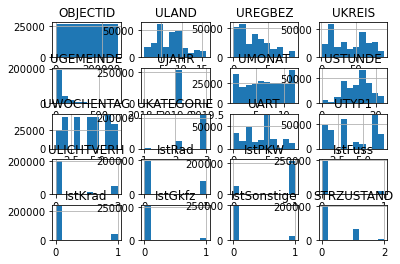

In [27]:
df1.hist()
plt.show()

Text(0.5, 0, 'Bezirke')

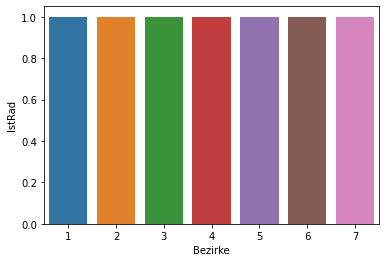

In [38]:
sns.barplot(data=df_fahrrad, x='UREGBEZ', y='IstRad')
plt.xlabel("Bezirke")

In [19]:
bezirke = ["Hamburg-Mitte", "Altona", "Eimsbüttel", "Hamburg-Nord", "Wandsbek", "Bergedorf", "Harburg"]

Text(0.5, 0, 'bezirke')

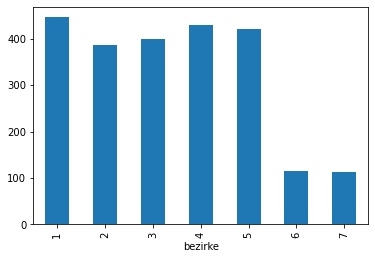

In [23]:
fahrrad.groupby('UREGBEZ').IstRad.sum().plot.bar()
plt.xlabel('bezirke')

In [9]:
df3.head()

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,STRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1,1170113152013852017,1,0,55,12,2017,1,5,6,...,1,0,0,0,2,2,"605079,422900000010000","6001757,554700000200000","10,609031240000036","54,153150062000066"
1,2,1170113171013912017,1,0,60,53,2017,1,6,6,...,0,1,0,1,2,1,"582297,218400000010000","5969288,968000000300000","10,251497589000053","53,865551422000067"
2,3,1170106105132242017,1,0,61,11,2017,1,18,6,...,1,0,0,0,2,1,"522799,299999999990000","5990575,725999999800000","9,348343807000049","54,062896651000074"
3,4,1170114152013542018,1,0,55,42,2017,1,12,7,...,1,0,0,0,0,0,"616128,937799999960000","5981557,289699999600000","10,770405204000042","53,969301629000029"
4,5,1170106161013732017,1,0,62,60,2017,1,8,6,...,1,0,0,0,0,1,"581575,998700000000000","5934905,202899999900000","10,231475138000064","53,556683829000065"


<BarContainer object of 7 artists>

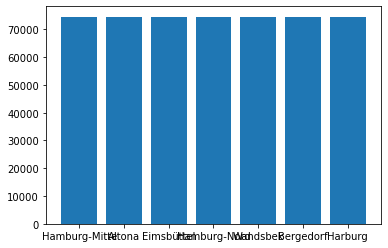

In [27]:
plt.bar(bezirke, df1.IstRad.sum())

In [36]:
unfallorte = gpd.read_file("Unfallorte2019_LinRef.shp")

NameError: name 'gpd' is not defined

# Kartendarstellung

In [82]:
# reminder: longitute = x, latitute =y
# Hier noch ganz Deutschland
BBox = ((df_concat.XGCSWGS84.min(),   df_concat.XGCSWGS84.max(),      
         df_concat.YGCSWGS84.min(), df_concat.YGCSWGS84.max()))

In [90]:
df_concat.XGCSWGS84.min()


5.867262086000039

In [86]:
df_concat.XGCSWGS84.max()

15.028682904000052

In [87]:
df_concat.YGCSWGS84.min()

47.31913869600004

In [88]:
df_concat.YGCSWGS84.max()

55.03693181000007

In [45]:
#Reduktion auf Hamburg
df_fahrrad = df_concat.loc[(df_concat['IstRad'] == 1) & (df_concat['ULAND']==2)]

In [93]:
df_fahrrad.XGCSWGS84.min()

9.741474206000019

In [94]:
df_fahrrad.XGCSWGS84.max()

10.273421083000072

In [95]:
df_fahrrad.YGCSWGS84.min()

53.39767648800006

In [96]:
df_fahrrad.YGCSWGS84.max()

53.71903274500005

In [46]:
BBox_HH = ((df_fahrrad.XGCSWGS84.min(),   df_fahrrad.XGCSWGS84.max(),      
         df_fahrrad.YGCSWGS84.min(), df_fahrrad.YGCSWGS84.max()))

In [47]:
map = plt.imread('map_HH.png')

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_fahrrad.XGCSWGS84, df_fahrrad.YGCSWGS84, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Fahrradunfälle 2016-2019 in Hamburg')
ax.set_xlim(BBox_HH[0],BBox_HH[1])
ax.set_ylim(BBox_HH[2],BBox_HH[3])
ax.imshow(map, zorder=0, extent = BBox_HH, aspect= 'equal')